In [1]:
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
# Define the paths to your CSV files
predictions_file_path = 'C:\\Users\\DELL\\Research_projects\\Random_walk_prediction\\files\\all_predictions_BTC.csv'
performance_metrics_file_path = 'C:\\Users\\DELL\\Research_projects\\Random_walk_prediction\\files\\performance_metrics_BTC.csv'

In [3]:
# Load the CSV files into DataFrames
df_predictions = pd.read_csv(predictions_file_path)
df_performance = pd.read_csv(performance_metrics_file_path)

# Display the loaded data to ensure correctness
print("Predictions Data:")
print(df_predictions.head())
print("\nPerformance Metrics Data:")
print(df_performance)

Predictions Data:
    Raw_Y_Test      Y_Fusion   Naive_Test  ARIMA_Predictions  LR_Predictions  \
0  25576.39453  25154.521415  25124.67578       25165.687271    25005.316111   
1  26327.46289  25606.240165  25576.39453       25553.009297    25441.507109   
2  26510.67578  26357.308525  26327.46289       26288.668419    26197.069863   
3  26336.21289  26540.521415  26510.67578       26501.224588    26340.532736   
4  26851.02930  26366.058525  26336.21289       26345.212706    26155.821513   

   MLP_Predictions  LSTM_Predictions  
0     25190.736328      25118.212891  
1     25764.724609      25467.943359  
2     26489.519531      26204.326172  
3     26634.406250      26439.755859  
4     26408.048828      26292.919922  

Performance Metrics Data:
   Models         MAE          MSE
0  Fusion  431.940881  449611.8283
1   Naive  433.766817  456875.1434
2   ARIMA  431.050006  456466.4535
3      LR  463.574310  486329.4172
4     MLP  496.776367  486248.2500
5    LSTM  457.213593  503120.

In [4]:
def plot_series(time, series, format="-", start=0, end=None):
    plt.plot(time[start:end], series[start:end], format)
    plt.xlabel("Time")
    plt.ylabel("Value")
    plt.grid(True)

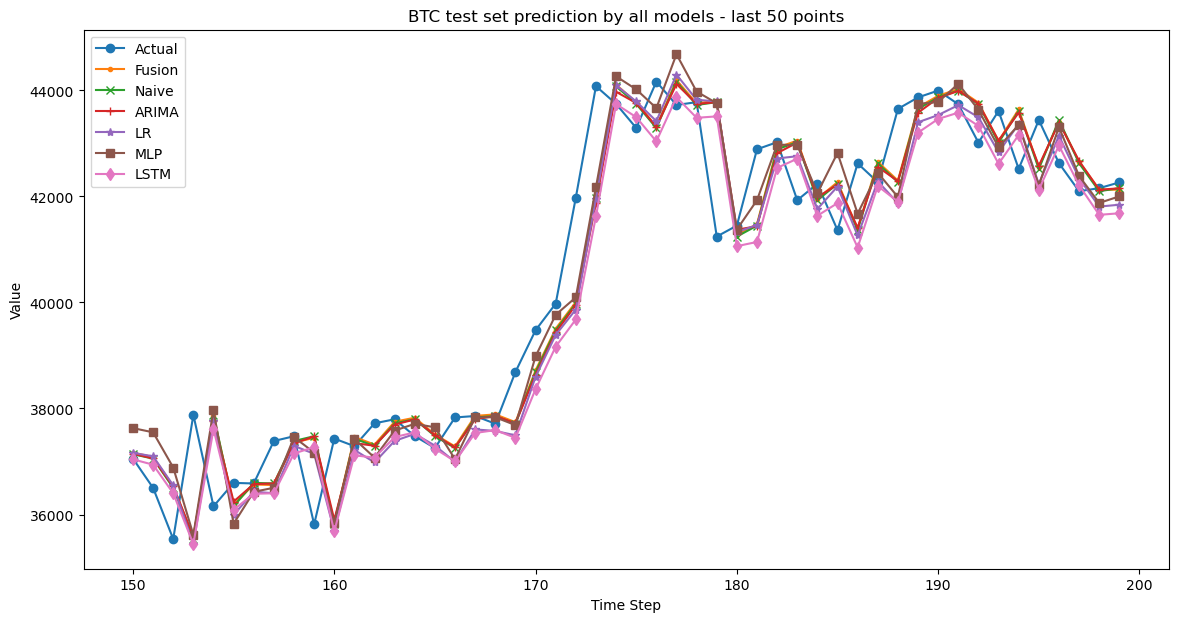

In [8]:
last_50_index = df_predictions.index[-50:]  # Get the index for the last 50 points

plt.figure(figsize=(14, 7))
plt.plot(last_50_index, df_predictions['Raw_Y_Test'][-50:], label='Actual', marker='o')
plt.plot(last_50_index, df_predictions['Y_Fusion'][-50:], label='Fusion', marker='.')
plt.plot(last_50_index, df_predictions['Naive_Test'][-50:], label='Naive', marker='x')
plt.plot(last_50_index, df_predictions['ARIMA_Predictions'][-50:], label='ARIMA', marker='+')
plt.plot(last_50_index, df_predictions['LR_Predictions'][-50:], label='LR', marker='*')
plt.plot(last_50_index, df_predictions['MLP_Predictions'][-50:], label='MLP', marker='s')
plt.plot(last_50_index, df_predictions['LSTM_Predictions'][-50:], label='LSTM', marker='d')

plt.title('BTC test set prediction by all models - last 50 points')
plt.xlabel('Time Step')
plt.ylabel('Value')
plt.legend()
plt.savefig("C:\\Users\\DELL\\Research_projects\\Random_walk_prediction\\figures\\ALL_MODELS_BTC.png", dpi = 300)
plt.show()

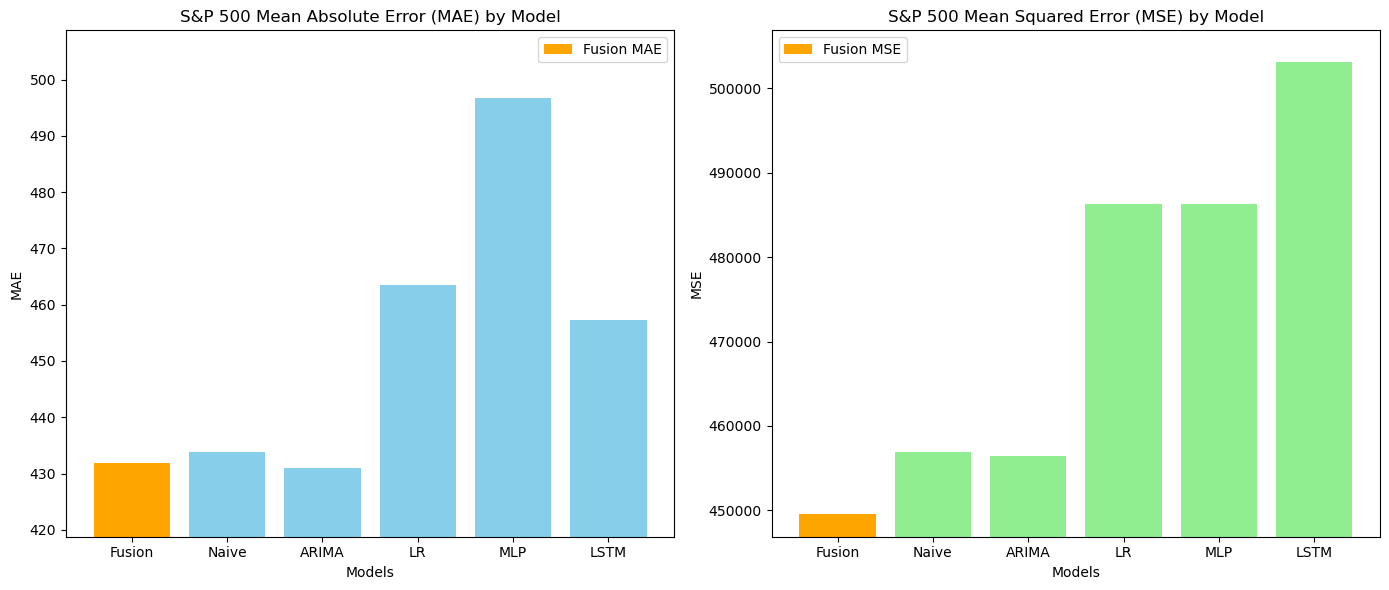

In [26]:
# Define margins
mae_margin = 15
mse_margin = 10000

# Get naive MAE and MSE
naive_mae = df_performance['MAE'][df_performance['Models'] == 'Naive'].values[0]
naive_mse = df_performance['MSE'][df_performance['Models'] == 'Naive'].values[0]

# Get fusion method MAE and MSE
fusion_mae = df_performance['MAE'][df_performance['Models'] == 'Fusion'].values[0]
fusion_mse = df_performance['MSE'][df_performance['Models'] == 'Fusion'].values[0]

# Plotting
fig, ax = plt.subplots(1, 2, figsize=(14, 6))

# Bar chart for MAE
ax[0].bar(df_performance['Models'], df_performance['MAE'], color='skyblue')
# ax[0].axhline(y=naive_mae, color='r', linestyle='--', label='Naive MAE')
ax[0].bar('Fusion', fusion_mae, color='orange', label='Fusion MAE')
ax[0].set_title('S&P 500 Mean Absolute Error (MAE) by Model')
ax[0].set_xlabel('Models')
ax[0].set_ylabel('MAE')
ax[0].set_ylim([naive_mae - 1 * mae_margin, naive_mae + 5 * mae_margin])  # Set y-limits around the naive MAE
ax[0].legend()

# Bar chart for MSE
ax[1].bar(df_performance['Models'], df_performance['MSE'], color='lightgreen')
# ax[1].axhline(y=naive_mse, color='r', linestyle='--', label='Naive MSE')
ax[1].bar('Fusion', fusion_mse, color='orange', label='Fusion MSE')
ax[1].set_title('S&P 500 Mean Squared Error (MSE) by Model')
ax[1].set_xlabel('Models')
ax[1].set_ylabel('MSE')
ax[1].set_ylim([naive_mse - 1 * mse_margin, naive_mse + 5 * mse_margin])  # Set y-limits around the naive MSE
ax[1].legend()

plt.tight_layout()
plt.savefig("C:\\Users\\DELL\\Research_projects\\Random_walk_prediction\\figures\\ALL_MODELS_Comparison_BTC.png", dpi = 300)
plt.show()